In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn
from pathlib import Path  #%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotnine as pn
from pathlib import Path
from grapher import load_df, graph_boxplot

In [43]:
iib_tbp_dna_cf = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB + TBP + DNA\\TFIIB + TBP + DNA_condensed_fractions.csv")

iib_tbp_dna_cf["fold_intensity"] = iib_tbp_dna_cf["mean_fg_intensity"] / iib_tbp_dna_cf[
    "mean_bg_intensity"]

iib_tbp_dna_cf = iib_tbp_dna_cf[iib_tbp_dna_cf["dir_name"] != "NoMg"]

iib_tbp_dna_cf["channel"] = ""
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["image_name"].str.contains("Blue1"), "channel"] = "DNA"
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["image_name"].str.contains("Green"), "channel"] = "TBP"
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["image_name"].str.contains("Blue6"), "channel"] = "TFIIB"
iib_tbp_dna_cf.loc[iib_tbp_dna_cf["channel"] == "", "channel"] = "Merged"
iib_tbp_dna_cf["dir_name"] = iib_tbp_dna_cf["dir_name"].astype("int")
iib_tbp_dna_cf["dir_name"] = pd.Categorical(iib_tbp_dna_cf["dir_name"], ordered=True,
                                            categories=sorted(
                                                np.unique(iib_tbp_dna_cf["dir_name"]).tolist()))


In [44]:
iib_tbp_dna_cf

,condensed_fraction,mean_intensity,std_intensity,max_intensity,min_intensity,mean_entropy,mean_bg_intensity,mean_fg_intensity,prep,dir_name,image_name,fold_intensity,channel
0,0.039895,0.035933,0.023063,0.208333,0.011667,0,0.031847,0.134266,TFIIB + TBP + DNA,0,Export_0ngul_DNA_000_RGB_BrightfieldBlue6,4.215953,TFIIB
1,0.031112,0.035238,0.020857,0.208333,0.013333,0,0.032017,0.135567,TFIIB + TBP + DNA,0,Export_0ngul_DNA_001_RGB_BrightfieldBlue6,4.234249,TFIIB
2,0.041386,0.033956,0.023030,0.203333,0.010833,0,0.029818,0.129789,TFIIB + TBP + DNA,0,Export_0ngul_DNA_002_RGB_BrightfieldBlue6,4.352632,TFIIB
3,0.036028,0.027032,0.018549,0.200000,0.007500,0,0.023985,0.108567,TFIIB + TBP + DNA,0,Export_0ngul_DNA_003_RGB_BrightfieldBlue6,4.526458,TFIIB
4,0.026705,0.022510,0.014769,0.191667,0.006667,0,0.020458,0.097280,TFIIB + TBP + DNA,0,Export_0ngul_DNA_004_RGB_BrightfieldBlue6,4.754989,TFIIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.067407,0.125367,0.094827,0.858380,0.037487,0,0.102840,0.437038,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_028_RGB,4.249702,Merged
232,0.056065,0.113554,0.081992,0.787594,0.031846,0,0.096126,0.406992,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_029_RGB,4.233965,Merged
233,0.080566,0.142246,0.096988,0.834997,0.037175,0,0.117219,0.427865,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_030_RGB,3.650137,Merged
234,0.078853,0.139327,0.098455,0.838344,0.029339,0,0.114094,0.434099,TFIIB + TBP + DNA 2,50,Export_50ngul_DNA_031_RGB,3.804742,Merged


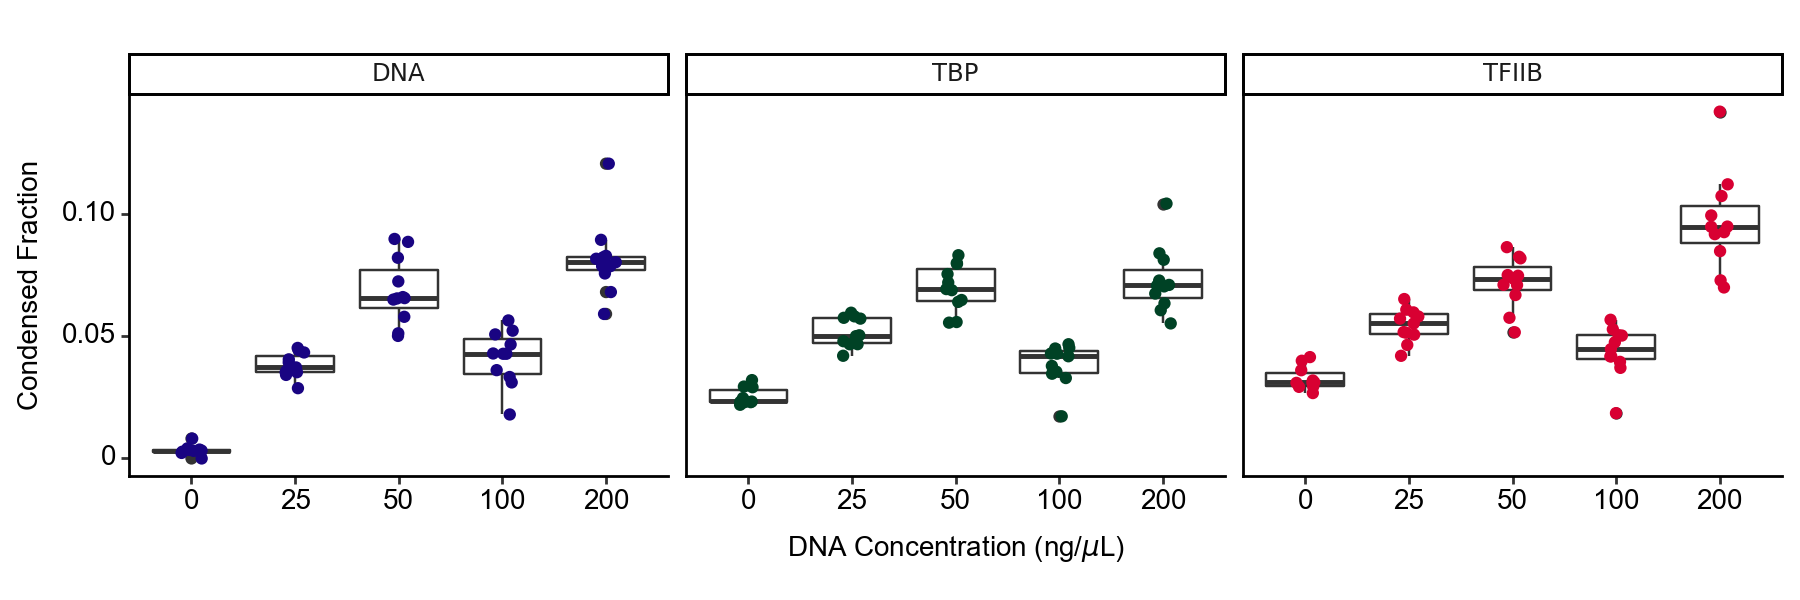

<Figure Size: (900 x 300)>

In [62]:
plot = (
        pn.ggplot(iib_tbp_dna_cf[iib_tbp_dna_cf["channel"] != "Merged"], pn.aes(x="dir_name",
                                                                                y="condensed_fraction",
                                                                                ))

        + pn.geom_boxplot(pn.aes())
        + pn.geom_jitter(pn.aes(color="channel"), width=0.1)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Condensed Fraction", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(9, 3),
                   legend_position="none",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.facet_wrap("~channel")
        + pn.scale_color_manual(values=["#190482", "#004225", "#D80032"])
)
plot

In [68]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB + TBP + DNA\\condensed_fraction.svg",
          dpi=1200, width=210, height=90, units="mm")

C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 210.00000000000003 x 90.00000000000001 mm image.
C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: C:\Users\danie\OneDrive - University of Cape Town\Hons Project\DataAnalysis\new_analysis_20231031\TFIIB + TBP + DNA\condensed_fraction.svg


In [29]:
iib_idr_tbp_cf = pd.read_csv(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB IDR + TBP all\\TFIIB IDR + TBP_condensed_fractions.csv")

iib_idr_tbp_cf["fold_intensity"] = iib_idr_tbp_cf["mean_fg_intensity"] / iib_idr_tbp_cf[
    "mean_bg_intensity"]

iib_idr_tbp_cf["channel"] = ""
iib_idr_tbp_cf.loc[iib_idr_tbp_cf[a
"image_name"].str.contains("Blue"), "channel"] = "TFIIB"
iib_idr_tbp_cf.loc[iib_idr_tbp_cf["image_name"].str.contains("Blue2"), "channel"] = "TBP"
iib_idr_tbp_cf.loc[iib_idr_tbp_cf["channel"] == "", "channel"] = "Merged"

iib_idr_tbp_cf["dir_name"] = pd.Categorical(iib_idr_tbp_cf["dir_name"], ordered=True,
                                            categories=sorted(
                                                np.unique(iib_idr_tbp_cf["dir_name"]).tolist()))


In [30]:
iib_idr_tbp_cf

,condensed_fraction,mean_intensity,std_intensity,max_intensity,min_intensity,mean_entropy,mean_bg_intensity,mean_fg_intensity,prep,dir_name,image_name,fold_intensity,channel
0,0.038153,0.088358,0.074816,0.715400,0.019638,0.0,0.075769,0.405729,TFIIB IDR + TBP,IIB IDR + TBP Core,Export_IIBIDR+TBP Core001_RGB_BrightfieldBlue2,5.354791,TBP
1,0.031470,0.085096,0.073130,0.715400,0.014027,0.0,0.073745,0.434455,TFIIB IDR + TBP,IIB IDR + TBP Core,Export_IIBIDR+TBP Core002_RGB_BrightfieldBlue2,5.891323,TBP
2,0.029593,0.092479,0.074090,0.715400,0.019638,0.0,0.081427,0.454883,TFIIB IDR + TBP,IIB IDR + TBP Core,Export_IIBIDR+TBP Core003_RGB_BrightfieldBlue2,5.586382,TBP
3,0.026569,0.094073,0.068150,0.715400,0.016833,0.0,0.084475,0.445695,TFIIB IDR + TBP,IIB IDR + TBP Core,Export_IIBIDR+TBP Core004_RGB_BrightfieldBlue2,5.276038,TBP
4,0.045589,0.132243,0.090294,0.715400,0.028055,0.0,0.115289,0.487180,TFIIB IDR + TBP,IIB IDR + TBP Core,Export_IIBIDR+TBP Core005_RGB_BrightfieldBlue2,4.225744,TBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000000,0.234221,0.010088,0.417396,0.170775,0.0,0.000000,0.234221,TFIIB IDR + TBP,IIB IDR + TBP IDR,Export_IIBIDR+TBP IDR006_RGB,inf,Merged
86,0.000000,0.238573,0.009366,0.404022,0.171058,0.0,0.000000,0.238573,TFIIB IDR + TBP,IIB IDR + TBP IDR,Export_IIBIDR+TBP IDR007_RGB,inf,Merged
87,0.000000,0.243699,0.009409,0.416808,0.174942,0.0,0.000000,0.243699,TFIIB IDR + TBP,IIB IDR + TBP IDR,Export_IIBIDR+TBP IDR008_RGB,inf,Merged
88,0.000000,0.247727,0.009476,0.437257,0.181692,0.0,0.000000,0.247727,TFIIB IDR + TBP,IIB IDR + TBP IDR,Export_IIBIDR+TBP IDR009_RGB,inf,Merged


In [38]:
plot = (
        pn.ggplot(iib_idr_tbp_cf[iib_idr_tbp_cf["channel"] != "Merged"], pn.aes(x="dir_name",
                                                                                y="fold_intensity",
                                                                                fill="channel",
                                                                                color="channel"))
        # + pn.geom_jitter(pn.aes(), width=0.1)
        + pn.geom_boxplot(pn.aes())
        + pn.theme_classic()
        + pn.labs(x="Mixing Experiment", y="Fold Intensity", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.facet_grid("x~.")
)
plot

PlotnineError: 'At least one layer must contain all variables used for facetting'

In [3]:

iib_tbp_constructs_cf, iib_constructs_regions = load_df(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB FL + TBP all_quant",
    "")






In [11]:
iib_tbp_constructs_cf["fold_intensity"] = iib_tbp_constructs_cf["mean_fg_intensity"] / iib_tbp_constructs_cf[
    "mean_bg_intensity"]

In [14]:
iib_tbp_constructs_cf["channel"] = ""
iib_tbp_constructs_cf.loc[iib_tbp_constructs_cf["image_name"].str.contains("Blue"), "channel"] = "TFIIB"
iib_tbp_constructs_cf.loc[iib_tbp_constructs_cf["image_name"].str.contains("Red"), "channel"] = "TBP"
iib_tbp_constructs_cf.loc[iib_tbp_constructs_cf["channel"] == "", "channel"] = "Merged"

In [18]:
iib_tbp_constructs_cf["dir_name"] = pd.Categorical(iib_tbp_constructs_cf["dir_name"], ordered=True,
                                                   categories=sorted(
                                                       np.unique(iib_constructs_regions["dir_name"]).tolist()))

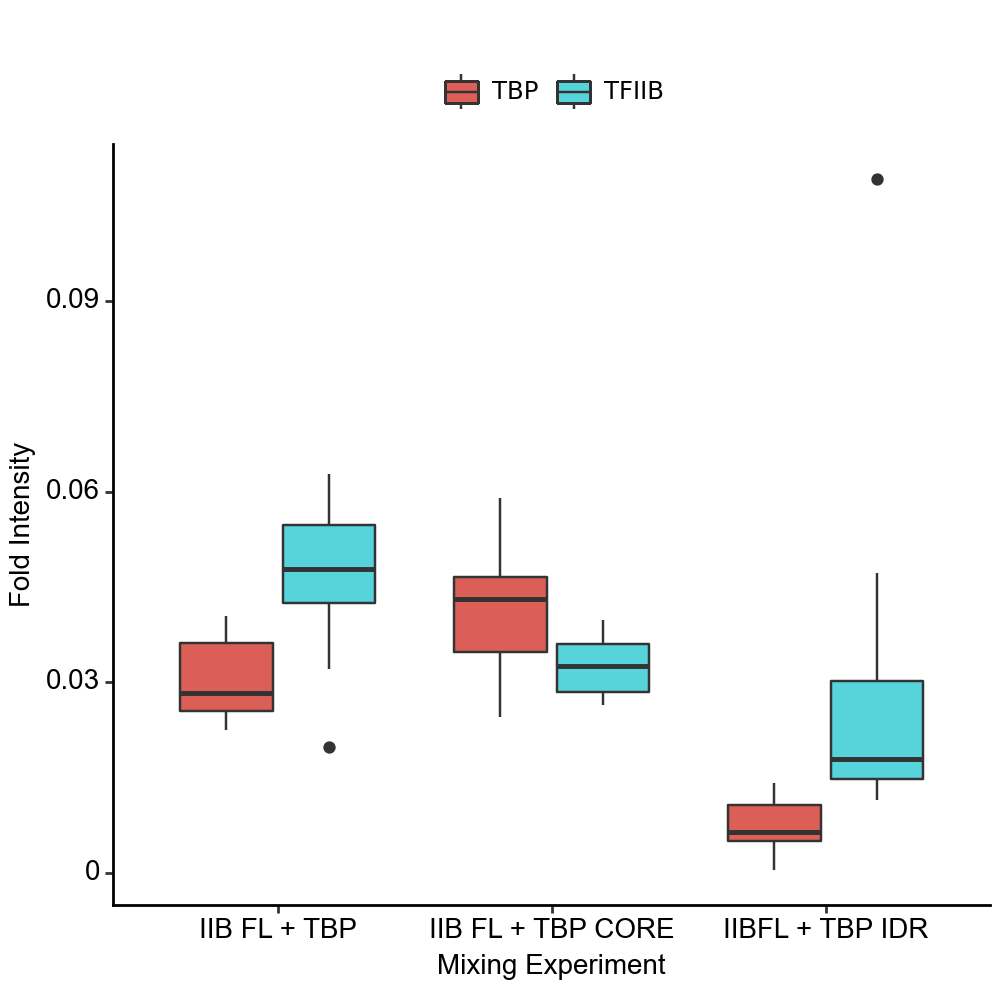

<Figure Size: (500 x 500)>

In [24]:
plot = (
        pn.ggplot(iib_tbp_constructs_cf[iib_tbp_constructs_cf["channel"] != "Merged"], pn.aes(x="dir_name",
                                                                                              y="condensed_fraction",
                                                                                              fill="channel"))
        # + pn.geom_jitter(pn.aes(), width=0.1)
        + pn.geom_boxplot(pn.aes())
        + pn.theme_classic()
        + pn.labs(x="Mixing Experiment", y="Fold Intensity", color="", fill="",
                  shape="")
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
)
plot

In [26]:
pn.ggsave(plot,
          "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031\\TFIIB FL + TBP all_quant\\condensed_fraction.png",
          dpi=1200, width=80, height=80, units="mm")

C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 80.0 x 80.0 mm image.
C:\Users\danie\code\llps_analysis\venv\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: C:\Users\danie\OneDrive - University of Cape Town\Hons Project\DataAnalysis\new_analysis_20231031\TFIIB FL + TBP all_quant\condensed_fraction.png


In [ ]:
# constructs = {
#
#     "TFIIB FL": 113,
#     "TFIIB Core": 28,
#     "TFIIB IDR": 153,
# }

constructs = {

    "TBP FL": 9,
    "TBP Core": 23,
    "TBP IDR": 63,
}


In [ ]:
def fix_concentration(row, constructs):
    return constructs[row["prep"]] / row["dir_name"]

In [ ]:
def load_construct_regions_and_cfs(constructs, base_dir, fix_conc=False):
    regions_dfs = []
    condensed_fraction_dfs = []

    for key in constructs.keys():
        temp = pd.read_csv(base_dir / key / f"{key}_regions.csv")
        temp["prep"] = key
        regions_dfs.append(temp)
        temp = pd.read_csv(base_dir / key / f"{key}_condensed_fractions.csv")
        temp["prep"] = key
        condensed_fraction_dfs.append(temp)

    regions = pd.concat(regions_dfs)
    condensed_fractions = pd.concat(condensed_fraction_dfs)

    if fix_conc:
        condensed_fractions["conc"] = condensed_fractions.apply(lambda row: fix_concentration(row, constructs), axis=1)

    return regions, condensed_fractions


In [ ]:
base_dir = Path(
    "C:\\Users\\danie\\OneDrive - University of Cape Town\\Hons Project\\DataAnalysis\\new_analysis_20231031")

In [ ]:
regions, condensed_fractions = load_construct_regions_and_cfs(constructs, base_dir, fix_conc=True)

In [ ]:
temp = condensed_fractions[["prep", "conc", "condensed_fraction"]]

In [ ]:
temp.columns = ["colour", "x", "y"]

In [ ]:

temp.loc[:, "x"] = temp["x"].astype("category")
temp.loc[:, "log_y"] = np.log10(temp["y"] + 1)

In [ ]:
# replacement = {
#     0.21875: 0.5,
#     0.4375: 0.5,
#     0.59765625: 0.5,
#     0.875: 1,
#     0.8828125: 1,
#     1.1953125: 1,
#     1.75: 2,
#     1.765625: 2,
#     2.390625: 2,
#     3.5: 3.5,
#     3.53125: 3.5,
#     4.78125: 5,
#     7.0: 7,
#     7.0625: 7,
#     9.5625: 9,
#     14.125: 14,
#     19.125: 20,
#     28.25: 28,
#     38.25: 38
# }

In [ ]:
replacement = {
    0.11842105263157894: 0.1,
    0.12849162011173185: 0.1,
    0.23684210526315788: 0.1,
    0.25842696629213485: 0.1,
    0.47368421052631576: 0.5,
    0.4921875: 0.5,
    0.5227272727272727: 0.5,
    0.984375: 1,
    1.0: 1,
    1.0454545454545454: 1,
    1.96875: 2,
    2.090909090909091: 2,
    2.25: 2,
    3.9375: 4,
    4.5: 5,
    4.6: 5,
    7.875: 8,
    11.5: 11,
    15.75: 16
}

In [ ]:
def help(row):
    if row["x"] in replacement.keys():
        return replacement[row["x"]]
    else:
        return row["x"]

In [ ]:
temp.loc[:, "x"] = temp.apply(lambda row: help(row), axis=1)

In [ ]:
temp.loc[:, "x"] = temp["x"].astype("category")

In [ ]:
temp["colour"] = temp["colour"].astype("str")

In [ ]:
temp[temp["colour"] == "TBP Core"] = "TBP C"

In [ ]:
temp["x"] = temp["x"].astype("float")

In [ ]:
np.unique(temp["x"]).tolist()

In [ ]:
temp.loc[temp["colour"] == "TBP IDR", "y"] = 0

In [ ]:
temp[temp["colour"] == "TBP IDR"]

In [ ]:
plot = (
        pn.ggplot(temp, pn.aes(x="x", y="y", shape="colour", fill="colour", color="colour"))
        # + pn.geom_point()
        + pn.geom_boxplot()
        + pn.theme_classic()
        + pn.labs(x="Concentration ($\mu$M)", y="Condensed Fraction", color="", fill="",
                  shape="")
        + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
        + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
        + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
plot.save(base_dir / "condensed_fraction_boxplot_tbp.svg", dpi=1200, width=80, height=80, units="mm")

In [ ]:
# # TFIIB Colours:
# + pn.scale_fill_manual(values=["#66c2a5", "#fc8d62", "#8da0cb"])
#         + pn.scale_color_manual(values=["#3a6b5c", "#a1583b", "#5d6a87"])

In [ ]:
rna_tfiib_regions = pd.read_csv(base_dir / "TFIIB + RNA" / "HSTFIIB + RNA_regions.csv")
rna_tfiib_cf = pd.read_csv(base_dir / "TFIIB + RNA" / "HSTFIIB + RNA_condensed_fractions.csv")
rna_tfiib_cf = rna_tfiib_cf[rna_tfiib_cf["dir_name"] != "RNA_control"]
rna_tfiib_cf["dir_name"] = rna_tfiib_cf["dir_name"].astype("int")

rna_tfiib_cf["dir_name"] = pd.Categorical(rna_tfiib_cf["dir_name"], ordered=True,
                                          categories=sorted(np.unique(rna_tfiib_regions["dir_name"]).tolist()))

In [ ]:
rna_tfiib_cf["fg_vs_bg"] = rna_tfiib_cf["mean_fg_intensity"] / rna_tfiib_cf["mean_bg_intensity"]
rna_tfiib_cf

In [ ]:
temp = rna_tfiib_cf.melt(id_vars=["dir_name"], value_vars=["mean_fg_intensity", "mean_bg_intensity"])
temp.loc[temp["variable"] == "mean_fg_intensity", "variable"] = "Foreground"
temp.loc[temp["variable"] == "mean_bg_intensity", "variable"] = "Background"
temp = temp.reset_index()

In [ ]:
temp["mean"] = temp.groupby(["dir_name", "variable"])["value"].transform("mean")

In [ ]:
temp = temp.groupby(["dir_name", "variable"])["value"].agg(["mean", "std", "count"]).reset_index()

In [ ]:
temp["std_err"] = temp["std"] / np.sqrt(temp["count"])

In [ ]:
temp["mean_plus_two_std_errs"] = temp["mean"] + 2 * temp["std_err"]
temp["mean_minus_two_std_errs"] = temp["mean"] - 2 * temp["std_err"]

In [ ]:
(
        pn.ggplot(temp, pn.aes(x="dir_name", y="mean", color="variable"))
        + pn.geom_point()
        # + pn.geom_line(pn.aes(group="variable"))
        + pn.geom_errorbar(pn.aes(ymin="mean_minus_two_std_errs", ymax="mean_plus_two_std_errs"), width=0.2)
        + pn.geom_smooth(pn.aes(group="variable"), method="lm")
        + pn.labs(x="RNA Concentration (ng/$\mu$L)", y="Mean Intensity", color="", fill="",
                  shape="",
                  caption="Mean Foreground and Background intensities as RNA is titrated into HsTFIIB FL.\nMean of ten datapoints with error bars showing 2 standard errors from the mean")

)

In [ ]:
plot = (
        pn.ggplot(rna_tfiib_cf, pn.aes(x="dir_name", y="fg_vs_bg"))

        + pn.geom_boxplot()
        + pn.geom_jitter(colour="#C70039", alpha=0.75)
        + pn.theme_classic()
        + pn.labs(x="RNA Concentration (ng/$\mu$L)", y="Fold Intensity", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TFIIB + RNA" / "fold_intensity.svg", dpi=1200, width=80, height=80, units="mm")

In [ ]:
dna_tfiib_regions = pd.read_csv(base_dir / "TFIIB + DNA" / "TFIIB + DNA_regions.csv")
dna_tfiib_cf = pd.read_csv(base_dir / "TFIIB + DNA" / "TFIIB + DNA_condensed_fractions.csv")
dna_tfiib_cf = dna_tfiib_cf[dna_tfiib_cf["dir_name"] != "RNA_control"]
dna_tfiib_cf["dir_name"] = dna_tfiib_cf["dir_name"].astype("int")

dna_tfiib_cf["dir_name"] = pd.Categorical(dna_tfiib_cf["dir_name"], ordered=True,
                                          categories=sorted(np.unique(dna_tfiib_regions["dir_name"]).tolist()))

In [ ]:
dna_tfiib_cf["channel"] = None
dna_tfiib_regions["channel"] = None

In [ ]:
dna_tfiib_cf.loc[dna_tfiib_cf["image_name"].str.contains("Blue"), "channel"] = "TFIIB"
dna_tfiib_cf.loc[dna_tfiib_cf["image_name"].str.contains("Red"), "channel"] = "DNA"

dna_tfiib_regions.loc[dna_tfiib_regions["image_name"].str.contains("Blue"), "channel"] = "TFIIB"
dna_tfiib_regions.loc[dna_tfiib_regions["image_name"].str.contains("Red"), "channel"] = "DNA"

In [ ]:
dna_tfiib_cf["fg_vs_bg"] = dna_tfiib_cf["mean_fg_intensity"] / dna_tfiib_cf["mean_bg_intensity"]

In [ ]:
plot = (
        pn.ggplot(dna_tfiib_cf[dna_tfiib_cf["channel"] == "TFIIB"], pn.aes(x="dir_name", y="condensed_fraction"))
        + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#C70039", alpha=0.75, width=0.2)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Condensed Fraction", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TFIIB + DNA" / "cond_fraction.svg", dpi=1200, width=80, height=80, units="mm")

In [ ]:
dna_tfiib_regions["log_area"] = np.log10(dna_tfiib_regions["area"])

In [ ]:
dna_tfiib_regions[dna_tfiib_regions["dir_name"] == 200]

In [ ]:
plot = (
        pn.ggplot(dna_tfiib_regions[dna_tfiib_regions["channel"] == "TFIIB"], pn.aes(x="dir_name", y="perimeter"))

        # + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#C70039", alpha=0.75, width=10)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Fold Intensity", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
dna_tbp_regions = pd.read_csv(base_dir / "TBP + DNA" / "TBP + DNA_regions.csv")
dna_tbp_cf = pd.read_csv(base_dir / "TBP + DNA" / "TBP + DNA_condensed_fractions.csv")
# dna_tbp_cf = dna_tbp_cf[dna_tbp_cf["dir_name"] != "RNA_control"]
dna_tbp_cf["dir_name"] = dna_tbp_cf["dir_name"].astype("int")

dna_tbp_cf["dir_name"] = pd.Categorical(dna_tbp_cf["dir_name"], ordered=True,
                                        categories=sorted(np.unique(dna_tbp_regions["dir_name"]).tolist()))

dna_tbp_cf["channel"] = None
dna_tbp_regions["channel"] = None

dna_tbp_cf.loc[dna_tbp_cf["image_name"].str.contains("Blue"), "channel"] = "TBP"
dna_tbp_cf.loc[dna_tbp_cf["image_name"].str.contains("Red"), "channel"] = "DNA"

dna_tbp_regions.loc[dna_tbp_regions["image_name"].str.contains("Blue"), "channel"] = "TBP"
dna_tbp_regions.loc[dna_tbp_regions["image_name"].str.contains("Red"), "channel"] = "DNA"

In [ ]:
dna_tbp_cf["fg_vs_bg"] = (dna_tbp_cf["mean_fg_intensity"]) / (dna_tbp_cf["mean_bg_intensity"])
dna_tbp_cf["bg_vs_fg"] = (dna_tbp_cf["mean_bg_intensity"]) / (dna_tbp_cf["mean_fg_intensity"])

In [ ]:
plot = (
        pn.ggplot(dna_tbp_cf[(dna_tbp_cf["channel"] == "TBP")],
                  pn.aes(x="dir_name", y="fg_vs_bg"))
        + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#A7D397", alpha=0.75, width=0.2)
        + pn.theme_classic()
        + pn.labs(x="DNA Concentration (ng/$\mu$L)", y="Fold Intensity", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TBP + DNA" / "fold_intensity.png", dpi=1200, width=80, height=80, units="mm")

In [ ]:
rna_tbp_regions = pd.read_csv(base_dir / "TBP + RNA" / "TBP + RNA_regions.csv")
rna_tbp_cf = pd.read_csv(base_dir / "TBP + RNA" / "TBP + RNA_condensed_fractions.csv")
rna_tbp_cf = rna_tbp_cf[rna_tbp_cf["dir_name"] != "RNA_ONLY"]
rna_tbp_cf["dir_name"] = rna_tbp_cf["dir_name"].astype("int")

rna_tbp_cf["dir_name"] = pd.Categorical(rna_tbp_cf["dir_name"], ordered=True,
                                        categories=sorted(np.unique(rna_tbp_regions["dir_name"]).tolist()))

rna_tbp_cf["fg_vs_bg"] = (rna_tbp_cf["mean_fg_intensity"]) / (rna_tbp_cf["mean_bg_intensity"])

In [ ]:
plot = (
        pn.ggplot(rna_tbp_cf, pn.aes(x="dir_name", y="condensed_fraction"))
        + pn.geom_boxplot(outlier_alpha=0)
        + pn.geom_jitter(colour="#A7D397", alpha=0.75, width=0.2)
        + pn.theme_classic()
        + pn.labs(x="RNA Concentration (ng/$\mu$L)", y="Condensed Fraction", color="", fill="",
                  shape="")
        # + pn.scale_x_discrete(labels=["0.1", "0.5", "1", "2", "4", "5", "8", "11", "16"])
        + pn.theme(figure_size=(5, 5),
                   legend_position="top",
                   axis_text=pn.element_text(color="black", size=10, family="Arial"),
                   axis_title=pn.element_text(color="black", size=10, family="Arial"))
    # + pn.scale_fill_manual(values=["#35b779", "#31688e", "#440154"])
    # + pn.scale_color_manual(values=["#154a31", "#1c3c52", "#1f0026"])
)
plot

In [ ]:
pn.ggsave(plot, base_dir / "TBP + RNA" / "condensed_fraction.svg", dpi=1200, width=80, height=80, units="mm")